# CATvsNonCat

### Data Format: (examples, features)
* 60,000 examples for training and 
* 10,000 examples for testing. 
* X_train (209 ,12288)
* Y_train (1,209)
* X_test (50,12288)
* Y_test (1, 50)

### Model 
* input > (W,b) > Output(sigmoid - 1)

### Results:

* Train Accuracy --- %99
* Test Accuracy  -- %74


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import tensorflow as tf

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Loading the dataset

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### Preprocessing

In [4]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [5]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(209, 12288)
(50, 12288)


In [6]:
Train_x = train_set_x_flatten/255.
Test_x = test_set_x_flatten/255.

Train_y = train_set_y.T
Test_y = test_set_y.T

In [8]:
print(Train_y.shape)
print(Test_y.shape)

(209, 1)
(50, 1)


### Model

In [10]:
# Parameters
learning_rate = 0.005
training_epochs = 500 ## was 2000 originally, was overfitting
batch_size = 100
display_step = 50

In [11]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 12288]) # mnist data image of shape 64*64
y = tf.placeholder(tf.float32, [None, 1]) # cat vs non cat

# Set model weights
W = tf.Variable(tf.zeros([12288, 1]))
b = tf.Variable(tf.constant(0.))

# Construct model
pred = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [12]:
cost = -tf.reduce_mean(y*tf.log(pred) + (1-y)*tf.log(1-pred))

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
init = tf.global_variables_initializer()

costs = [[],[]]

In [15]:
with tf.Session() as sess:
    sess.run(init)
   
    # Training cycle
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={x: Train_x,
                                                          y: Train_y})
        if (epoch+1) % 10 == 0:    
            costs[0].append(c)
            costs[1].append(cost.eval(feed_dict={x: Test_x, y: Test_y}))
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")
    temp_y = tf.placeholder(tf.int64, [None,1])
    # Test model
    correct_prediction = tf.equal(tf.greater(pred, tf.constant(0.5)), tf.cast(temp_y, bool))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print("Train Accuracy:", accuracy.eval({x: Train_x, y: Train_y, temp_y: Train_y}))
    print("Test Accuracy:", accuracy.eval({x: Test_x, y: Test_y, temp_y: Test_y}))

Epoch: 0050 cost= 0.756707311
Epoch: 0100 cost= 0.644897819
Epoch: 0150 cost= 0.557067811
Epoch: 0200 cost= 0.484893590
Epoch: 0250 cost= 0.424997032
Epoch: 0300 cost= 0.377761483
Epoch: 0350 cost= 0.348835438
Epoch: 0400 cost= 0.331775427
Epoch: 0450 cost= 0.316948056
Epoch: 0500 cost= 0.303528666
Optimization Finished!
Train Accuracy: 0.923445
Test Accuracy: 0.74


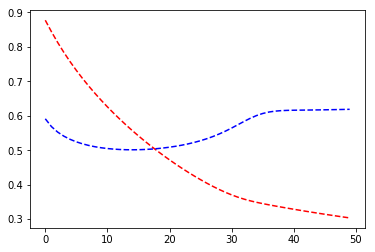

In [20]:
plt.plot(costs[0], 'r--')
plt.plot(costs[1], 'b--')
plt.show()
